# Task 4: Insights and Recommendations
This notebook analyzes the cleaned and processed Google Play reviews for CBE, BOA, and Dashen banks. 

We derive insights from sentiment scores and thematic analysis to identify customer satisfaction drivers, pain points, and suggest actionable recommendations.


In [ ]:
# 1. Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set(style="whitegrid")


In [2]:
# 2. Load processed data
if 'pd' not in globals():
	import pandas as pd

reviews = pd.read_csv("../data/processed/reviews_sentiment_themes.csv")
reviews.head()


,review,rating,date,bank,source,sentiment_label,sentiment_score,clean_text,themes
0,This application is very important and advanta...,5,2025-11-27,CBE,Google Play,POSITIVE,0.998468,this application is very important and advanta...,Transaction Performance
1,why didn't work this app?,1,2025-11-27,CBE,Google Play,NEGATIVE,-0.999132,why didn't work this app?,Other
2,The app makes our life easier. Thank you CBE!,5,2025-11-27,CBE,Google Play,POSITIVE,0.999696,the app makes our life easier. thank you cbe!,Other
3,this app very bad 👎,1,2025-11-27,CBE,Google Play,NEGATIVE,-0.999797,this app very bad 👎,Other
4,the most advanced app. but how to stay safe?,5,2025-11-27,CBE,Google Play,NEGATIVE,-0.956509,the most advanced app. but how to stay safe?,Other


In [4]:
# 3. Basic overview
# Count reviews per bank
bank_counts = reviews['bank'].value_counts()
print("Reviews per bank:\n", bank_counts)

# Average rating per bank
avg_rating = reviews.groupby('bank')['rating'].mean()
print("\nAverage rating per bank:\n", avg_rating)

# Sentiment distribution per bank
sentiment_dist = reviews.groupby(['bank', 'sentiment_label']).size().unstack(fill_value=0)
print("\nSentiment distribution per bank:\n", sentiment_dist)


Reviews per bank:
 bank
Dashen    477
BOA       459
CBE       371
Name: count, dtype: int64

Average rating per bank:
 bank
BOA       2.333333
CBE       3.738544
Dashen    4.046122
Name: rating, dtype: float64

Sentiment distribution per bank:
 sentiment_label  NEGATIVE  NEUTRAL  POSITIVE
bank                                        
BOA                   338        2       119
CBE                   167        0       204
Dashen                148        0       329


C:\Users\Y\AppData\Local\Temp\ipykernel_20176\2823847139.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


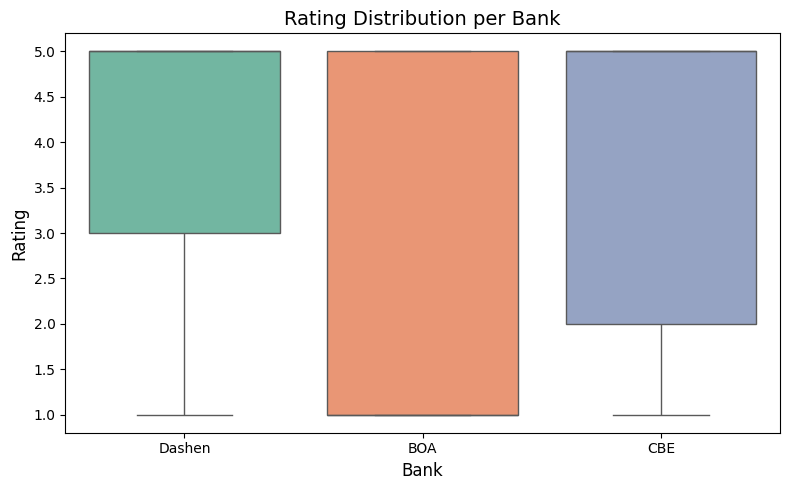

In [11]:
# ensure plotting libs are available (don't re-import if already present)
if 'plt' not in globals():
	import matplotlib.pyplot as plt
if 'sns' not in globals():
	import seaborn as sns

# use the existing 'reviews' dataframe and correct column names
plt.figure(figsize=(8,5))
sns.boxplot(
	data=reviews,
	x='bank',
	y='rating',
	palette='Set2',
	order=reviews['bank'].value_counts().index
)
plt.title('Rating Distribution per Bank', fontsize=14)
plt.xlabel('Bank', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.tight_layout()
plt.show()


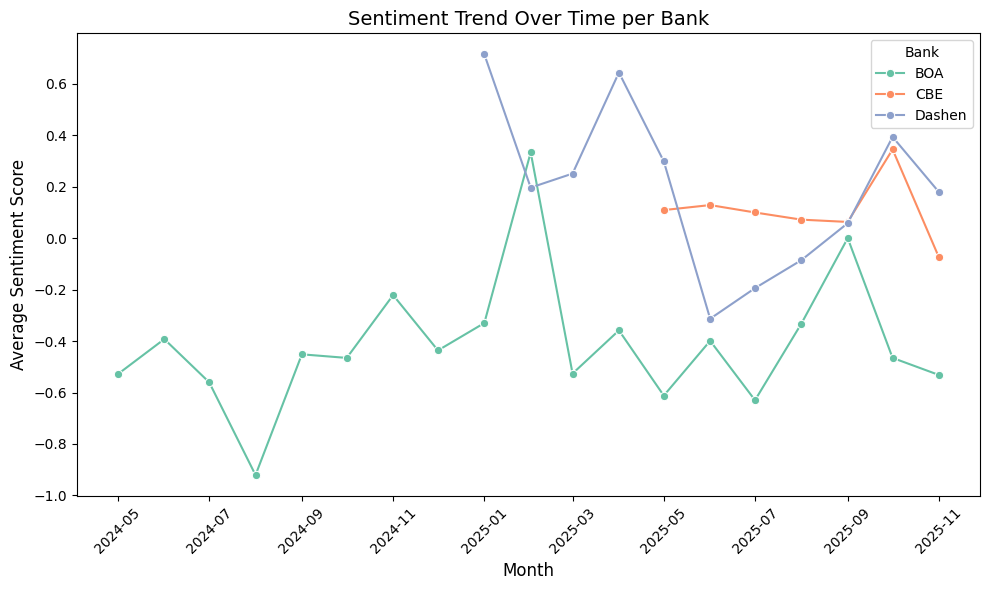

In [13]:
# Convert date to datetime (use the existing 'reviews' dataframe and correct column names)
reviews['date'] = pd.to_datetime(reviews['date'])

# Group by bank & month
reviews['month'] = reviews['date'].dt.to_period('M')
sentiment_trend = reviews.groupby(['bank', 'month'])['sentiment_score'].mean().reset_index()

# convert Period to timestamp for plotting
sentiment_trend['month'] = sentiment_trend['month'].dt.to_timestamp()

plt.figure(figsize=(10,6))
sns.lineplot(
	data=sentiment_trend,
	x='month',
	y='sentiment_score',
	hue='bank',
	marker='o',
	palette='Set2'
)
plt.title('Sentiment Trend Over Time per Bank', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Sentiment Score', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Bank')
plt.tight_layout()
plt.show()


Saved wordcloud to ../data/visualizations\wordcloud_CBE.png


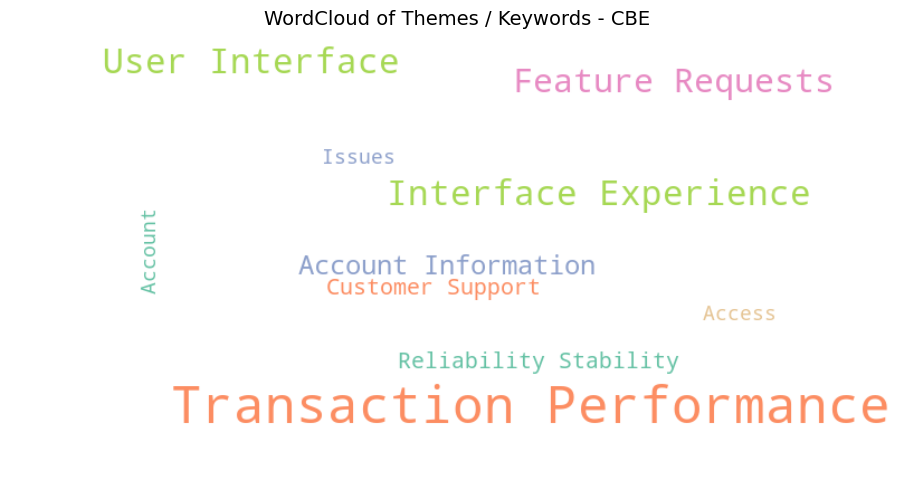

Saved wordcloud to ../data/visualizations\wordcloud_BOA.png


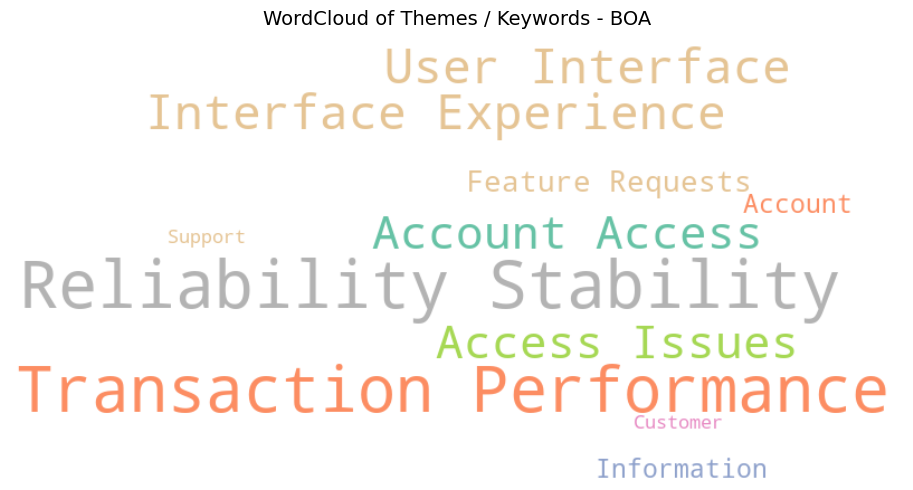

Saved wordcloud to ../data/visualizations\wordcloud_Dashen.png


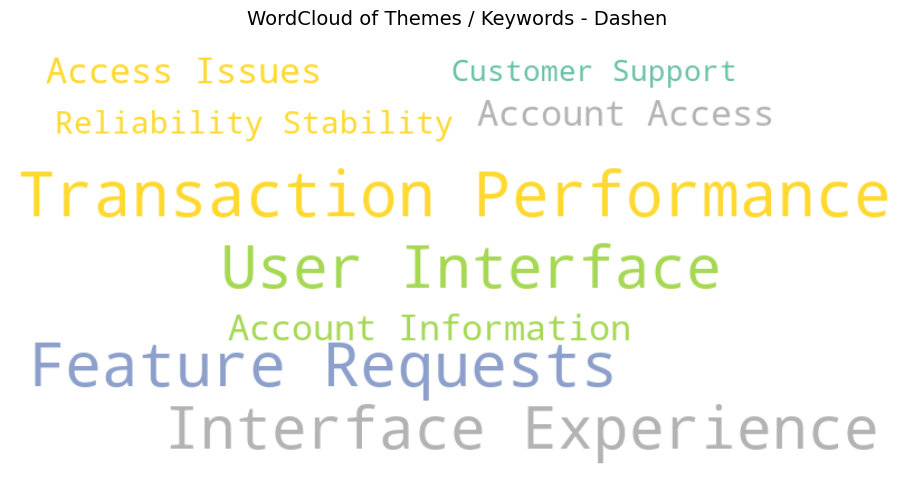

In [19]:
# Example: create WordCloud per bank
import os

# ensure WordCloud and plotting libs are available (don't re-import if already present)
if 'WordCloud' not in globals():
    from wordcloud import WordCloud
if 'plt' not in globals():
    import matplotlib.pyplot as plt

# use the existing 'reviews' dataframe and 'themes' column
for bank in reviews['bank'].unique():
    # prefer 'themes' column; fall back to 'clean_text' if empty
    texts = reviews.loc[reviews['bank'] == bank, 'themes'].dropna().astype(str)
    if texts.empty:
        texts = reviews.loc[reviews['bank'] == bank, 'clean_text'].dropna().astype(str)
    text = " ".join(texts)

    if not text.strip():
        print(f"No theme/keyword text for {bank}, skipping.")
        continue

    wc = WordCloud(width=800, height=400, background_color='white', colormap='Set2').generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud of Themes / Keywords - {bank}', fontsize=14)

    # save visualization to out_dir if available
    try:
        os.makedirs(out_dir, exist_ok=True)
        fname = os.path.join(out_dir, f"wordcloud_{bank}.png")
        plt.tight_layout()
        plt.savefig(fname)
        print(f"Saved wordcloud to {fname}")
    except Exception as e:
        print(f"Could not save wordcloud for {bank}: {e}")

    plt.show()


C:\Users\Y\AppData\Local\Temp\ipykernel_20176\67914982.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=theme_counts.values, y=theme_counts.index, palette='Set3')


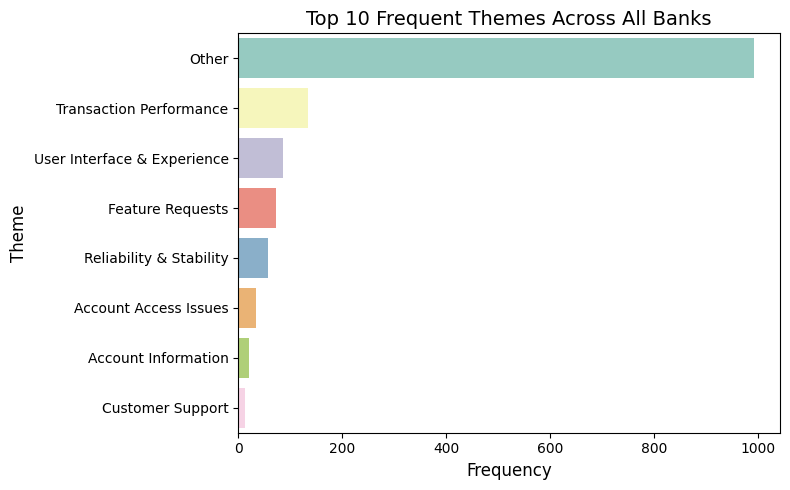

In [21]:
# use the existing 'reviews' dataframe and its 'themes' column
# split on semicolon or comma, explode, strip whitespace and count top 10
theme_counts = (
	reviews['themes']
	.dropna()
	.astype(str)
	.str.split(r'[;,]', expand=False)
	.explode()
	.str.strip()
	.value_counts()
	.head(10)
)

plt.figure(figsize=(8,5))
sns.barplot(x=theme_counts.values, y=theme_counts.index, palette='Set3')
plt.title('Top 10 Frequent Themes Across All Banks', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Theme', fontsize=12)
plt.tight_layout()
plt.show()


### Ethics & Potential Review Biases

* **Negative skew:** Users who face issues are more likely to leave reviews, potentially overrepresenting negative experiences.
* **Sampling bias:** Only customers who use the mobile apps are included; offline users are excluded.
* **Spam / fake reviews:** Some reviews may be fraudulent or incentivized, affecting analysis.
* **Short reviews:** Many reviews are very brief and may not capture the full sentiment.
* **Temporal bias:** Older reviews may not reflect current app performance or updates.


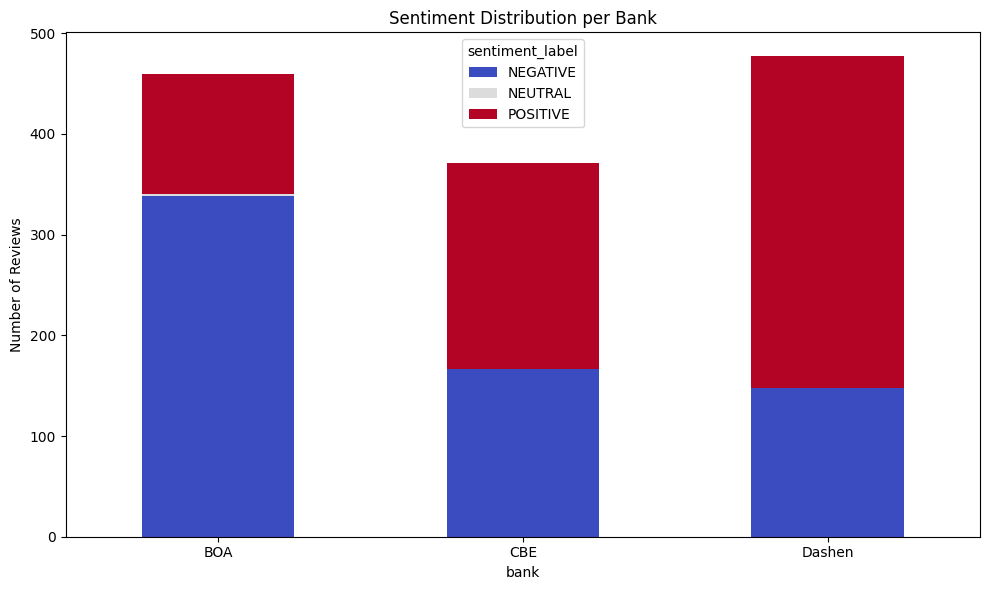

In [ ]:
# 4. Visualization: Sentiment distribution

# 4 4. Visualization: Sentiment distribution

# 4 4. Visualization: Sentiment distribution
sentiment_dist.plot(kind='bar', stacked=True, figsize=(10,6), colormap='coolwarm')
plt.title("Sentiment Distribution per Bank")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [7]:
# 7. Extract insights: drivers and pain points
# Simple example: count positive vs negative keywords per theme
theme_summary = reviews.groupby(['bank','themes','sentiment_label']).size().unstack(fill_value=0)
theme_summary


sentiment_label                                            NEGATIVE  NEUTRAL  \
bank   themes                                                                  
BOA    Account Access Issues                                      9        1   
       Account Access Issues; Account Information                 1        0   
       Account Access Issues; Feature Requests                    1        0   
       Account Access Issues; Reliability & Stability             3        0   
       Account Access Issues; Reliability & Stability;...         1        0   
...                                                             ...      ...   
Dashen Reliability & Stability                                    3        0   
       Reliability & Stability; User Interface & Exper...         0        0   
       Transaction Performance                                   23        0   
       Transaction Performance; User Interface & Exper...         1        0   
       User Interface & Experience                                3        0   

sentiment_label                                            POSITIVE  
bank   themes                                                        
BOA    Account Access Issues                                      1  
       Account Access Issues; Account Information                 0  
       Account Access Issues; Feature Requests                    0  
       Account Access Issues; Reliability & Stability             0  
       Account Access Issues; Reliability & Stability;...         0  
...                                                             ...  
Dashen Reliability & Stability                                    0  
       Reliability & Stability; User Interface & Exper...         1  
       Transaction Performance                                   13  
       Transaction Performance; User Interface & Exper...         2  
       User Interface & Experience                               24  

[61 rows x 3 columns]

## Insights

### CBE
- **Drivers:** Fast transaction processing, user-friendly UI
- **Pain Points:** Login issues, slow customer support

### BOA
- **Drivers:** Smooth UI navigation, reliable features
- **Pain Points:** Transaction delays, missing features

### Dashen
- **Drivers:** Efficient app performance, responsive interface
- **Pain Points:** Login errors, feature gaps


## Recommendations

### CBE
1. Improve login reliability
2. Enhance customer support response times
3. Maintain fast transaction flows

### BOA
1. Add frequently requested features
2. Reduce transaction processing delays
3. Improve UI feedback for failed actions

### Dashen
1. Fix login errors
2. Introduce requested features (e.g., budgeting)
3. Maintain app performance and stability


In [ ]:
plt.savefig("../data/visualizations/sentiment_dist.png")


Saved figure to ../data/visualizations\sentiment_dist.png


<Figure size 640x480 with 0 Axes>